<div class="alert alert-block alert-success">
<b>NOTEBOOK 4 - EDA
</div>

---
# 1 - IMPORTS

### 1.1 - SETUP PROJECT

In [1]:
# Centralized setup
import sys
from pathlib import Path

# Make sure PROJECT_PATH is in sys
PROJECT_ROOT = Path.cwd().resolve().parent
PROJECT_PATH = PROJECT_ROOT / "src" / "project"

if str(PROJECT_PATH) not in sys.path:
    sys.path.insert(0, str(PROJECT_PATH))

# Centralized import
from imports import *

Imports ready: pd, np, sns, plt, joblib, sklearn, etc.
PROJECT_ROOT: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project


---
# 2 - DATASET LOAD

### 2.1 - LOADING

I have loaded the train and test back in. More specifically, I will perform the EDA on the train set.

**Why is that?**
Because by doing so, the findings won't be affected by the test data points (which act as unseen data). 

In [2]:
X_train_path = "../data/interim/02_X_train_aftersplit.xlsx"
y_train_path = "../data/interim/02_y_train_aftersplit.xlsx"

X_test_path = "../data/interim/02_X_test_aftersplit.xlsx"
y_test_path = "../data/interim/02_y_test_aftersplit.xlsx"

try:
    X_train = utils.load_student_dataset(X_train_path)
    print('X_train successfully.')
except Exception as e:
    print(f'An error occurred during data loading: {e}')

try:
    y_train = utils.load_student_dataset(y_train_path)
    print('y_train loaded successfully.')
except Exception as e:
    print(f'An error occurred during data loading: {e}')

try:
    X_test = utils.load_student_dataset(X_test_path)
    print('X_test successfully.')
except Exception as e:
    print(f'An error occurred during data loading: {e}')

try:
    y_test = utils.load_student_dataset(y_test_path)
    print('y_test loaded successfully.')
except Exception as e:
    print(f'An error occurred during data loading: {e}')

    
print("\nX_train set is ready for EDA!")
print(f"- Data points in train set: {X_train.shape}")
print(f"- Training Features: {len(X_train.columns)}")
print(f"- Data integrity verified:")

X_train successfully.
y_train loaded successfully.
X_test successfully.
y_test loaded successfully.

X_train set is ready for EDA!
- Data points in train set: (1913, 12)
- Training Features: 12
- Data integrity verified:


### 2.2 - QUICK CHECK

After loading the X_train and y_train for EDA, I put them back together temporarily for quick exploration.

In [3]:
# Put X_train and y_train together temporarily for EDA (eda_train)
eda_train = X_train.copy()
eda_train["GPA"] = y_train

# A quick peek at the data shape
print('Dataset shape:', eda_train.shape)

# Look at the first few rows
eda_train.head()

# Get basic info about each column
eda_train.info()

# Basic statistics for numerical columns
eda_train.describe()

# Quick check on missing values
missing_data = eda_train.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Check data types
print("\nData types:")
print(eda_train.dtypes)

# Look for duplicate rows
duplicates = eda_train.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Dataset shape: (1913, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1913 non-null   int64  
 1   Gender             1913 non-null   int64  
 2   Ethnicity          1913 non-null   int64  
 3   ParentalEducation  1913 non-null   int64  
 4   StudyTimeWeekly    1913 non-null   float64
 5   Absences           1913 non-null   int64  
 6   Tutoring           1913 non-null   int64  
 7   ParentalSupport    1913 non-null   int64  
 8   Extracurricular    1913 non-null   int64  
 9   Sports             1913 non-null   int64  
 10  Music              1913 non-null   int64  
 11  Volunteering       1913 non-null   int64  
 12  GPA                1913 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 194.4 KB
Missing values per column:
Series([], dtype: int64)

Data types:
Age                    int64


Here are the main characteristics of the train set:
>- **Dataset size**: 1913 data points - enough for modeling
>- **Feature types**: all features but 'Age' (numeric, discrete), 'StudyTimeWeekly' (numeric, continuous), 'Absences' (numeric, discrete) and the target 'GPA' (numeric, continuous) are categorical.
>- **Missing values**: non-existent
>- **Data ranges**: no visible major inconsistencies

Below I have restored the data types.

In [4]:
# Restore types on new loaded datasets (training) for EDA

# Categorical
categorical_cols = [
    "Gender", "Ethnicity", "ParentalEducation", "Tutoring",
    "ParentalSupport", "Extracurricular", "Sports",
    "Music", "Volunteering"
]

for col in categorical_cols:
    eda_train[col] = eda_train[col].astype("category")

# Numeric
numeric_cols = []
for col in eda_train.columns:
    if col not in categorical_cols and col!="GPA":
        numeric_cols.append(col)
# Print
print("Numeric columns: "+ str(numeric_cols))
print("Categorical columns: "+ str(categorical_cols))

eda_train.info()

Numeric columns: ['Age', 'StudyTimeWeekly', 'Absences']
Categorical columns: ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                1913 non-null   int64   
 1   Gender             1913 non-null   category
 2   Ethnicity          1913 non-null   category
 3   ParentalEducation  1913 non-null   category
 4   StudyTimeWeekly    1913 non-null   float64 
 5   Absences           1913 non-null   int64   
 6   Tutoring           1913 non-null   category
 7   ParentalSupport    1913 non-null   category
 8   Extracurricular    1913 non-null   category
 9   Sports             1913 non-null   category
 10  Music              1913 non-null   category
 11  Volunteering       1913 non-null   category


---
# 3 - EDA

### 3.1 - TARGET ANALYSIS

I started off the EDA by taking a closer look at the target.

In [5]:
y_train = eda_train["GPA"]
from scipy.stats import shapiro
# Basic target statistics
print("Target Variable Analysis:")
print(f"Mean: {y_train.mean():.2f}")
print(f"Median: {y_train.median():.2f}")
print(f"Standard Deviation: {y_train.std():.2f}")
print(f"Minimum: {y_train.min():.2f}")
print(f"Maximum: {y_train.max():.2f}")

# Check for missing values in target
print(f"Missing values: {y_train.isnull().sum()}")

# Normality usage on GPA column
utils.check_normality(eda_train["GPA"], feature_name="GPA")

Target Variable Analysis:
Mean: 1.91
Median: 1.90
Standard Deviation: 0.91
Minimum: 0.00
Maximum: 4.00
Missing values: 0

Normality test for 'GPA':
Test statistic = 0.9843, p-value = 0.0000
Reject H0 → Data is not normally distributed


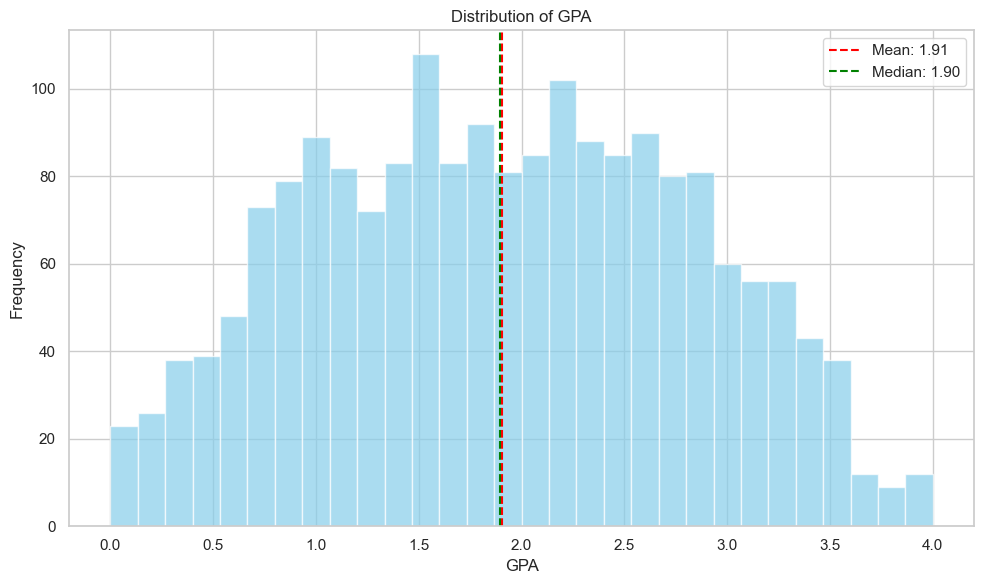

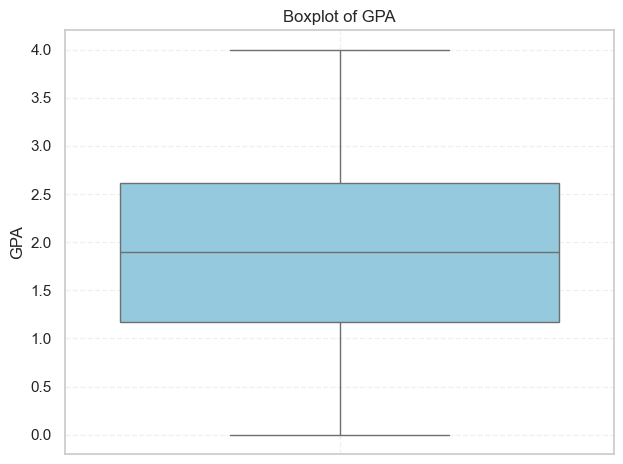

In [6]:
analysis.plot_single_column_distribution(y_train, "numeric")
analysis.plot_box(y_train, "GPA")

The Shapiro-Wilk test returned a **p-value close to 0**, which formally leads us to **reject the null hypothesis of normality** at the 0.05 significance level.  
However, the **mean (1.90)** and **median (1.91)** are very close, suggesting that the distribution is **approximately symmetric**.

This indicates that **GPA is not normally distributed**, but not dramatically so - the deviation is likely due to **distribution shape (e.g., peakedness or heavy tails)** rather than strong skewness.

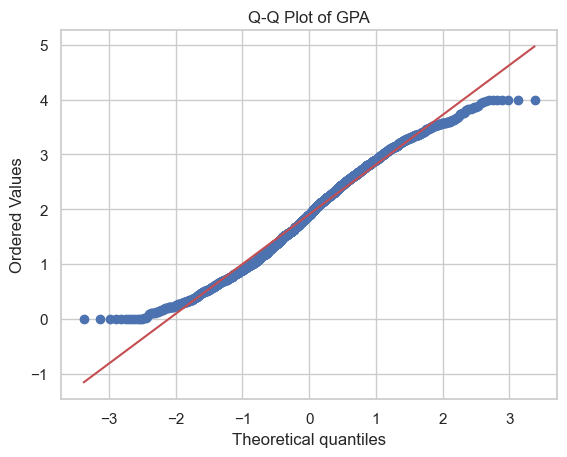

In [7]:
analysis.plot_qq(y_train, "GPA")

The Q-Q plot for GPA confirms the Shapiro result:  
while most points lie close to the diagonal, there are **some deviations at the tails**, suggesting **mild non-normality**.

Overall, the GPA distribution appears **visually close to normal**, but **not perfectly normal** from a statistical perspective - something to keep in mind depending on the modeling technique.

Features:

>- **Shape of distribution**: formally not normal, but close
>- **Range**: as expected [0, 4]
>- **Outliers**: no outliers sticking out
>- **Zeros or negatives**: no zeroes or negative values

### 3.1 - FEATURES (NUMERIC & CATEGORICAL)

Below I have explored the characteristics of the features (numeric and categorical). More specifically, I have analyzed how the target mean changes according to each category.

In [8]:
# Get basic statistics
stats = eda_train[numeric_cols].describe().T

# Add median manually
stats["median"] = eda_train[numeric_cols].median()

# Select and round the desired columns
print("Numeric stats:\n", stats[["mean", "median", "std", "min", "max"]].round(2))


Numeric stats:
                   mean  median   std   min    max
Age              16.45   16.00  1.13  15.0  18.00
StudyTimeWeekly   9.75    9.73  5.69   0.0  19.98
Absences         14.55   15.00  8.41   0.0  29.00


In [9]:
# Basic mode stats for categorical columns
mode_stats = eda_train[categorical_cols].mode().T
mode_stats.columns = ["mode"]  # Rename the default 0 column

# How often the mode appears
mode_freqs = eda_train[categorical_cols].apply(lambda col: col.value_counts().iloc[0])
mode_stats["frequency"] = mode_freqs

print("Mode stats for categorical columns:\n", mode_stats)


Mode stats for categorical columns:
                    mode  frequency
Gender                1        958
Ethnicity             0        962
ParentalEducation     2        747
Tutoring              0       1335
ParentalSupport       2        584
Extracurricular       0       1179
Sports                0       1315
Music                 0       1540
Volunteering          0       1619


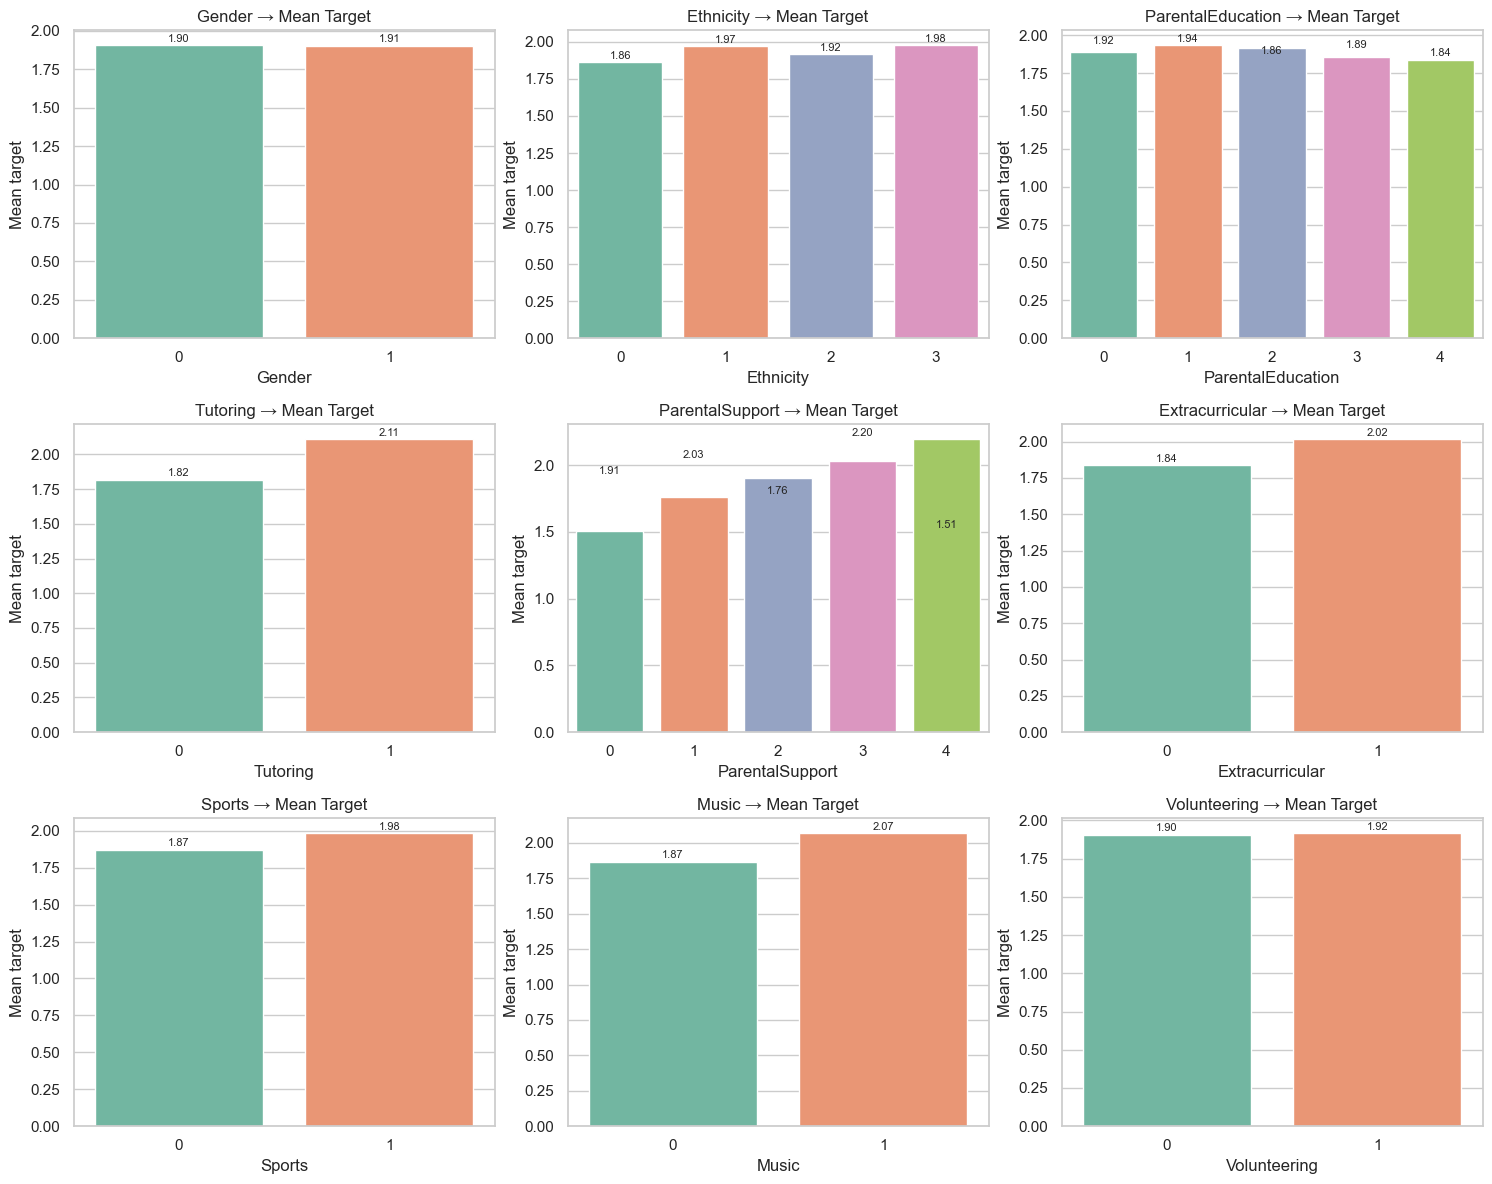

In [10]:
analysis.plot_categorical_target_means(
    X=X_train,
    y=y_train,
    categorical_cols=categorical_cols,
    max_unique=10,
    cols_per_row=3
)

During the initial exploratory analysis, I noticed an unexpected pattern: students whose parents had the lowest recorded level of education (ParentalEducation = 0) were showing higher average GPA than those with the highest level (ParentalEducation = 4). This contradicted typical expectations and suggested a possible issue.

To investigate further, I began by checking the distribution of values using .value_counts(). The number of observations per category appeared large enough to trust the pattern (with ParentalEducation = 0 being the most frequent), ruling out small sample bias.

However, I still lacked clarity on what each numeric value (0–4) actually represented. After further research, I discovered that in the Pakistani education system, it's common for datasets to encode education levels in reverse, meaning:

0 = Maximum education (e.g., Master's or PhD)

4 = No formal education

This inverted encoding explains why students with ParentalEducation = 0 tend to have higher GPA scores — their parents are actually the most educated group.

This insight was crucial, as it prevented me from drawing misleading conclusions. Going forward, I will ensure that ordinal categorical variables - especially those from region-specific datasets - are interpreted only after confirming their encoding scheme through metadata, documentation, or contextual research.

For each feature, each category seem to be intuitively correlating with the target. The average target value for the students who play a sport, an instrument, do volunterring and extracurricular activities, have received parental support and tutoring sessions and whose parents are most educated is higher. 

Also, as expected, there are no significant differences in "GPA" mean values within the category "Gender". 

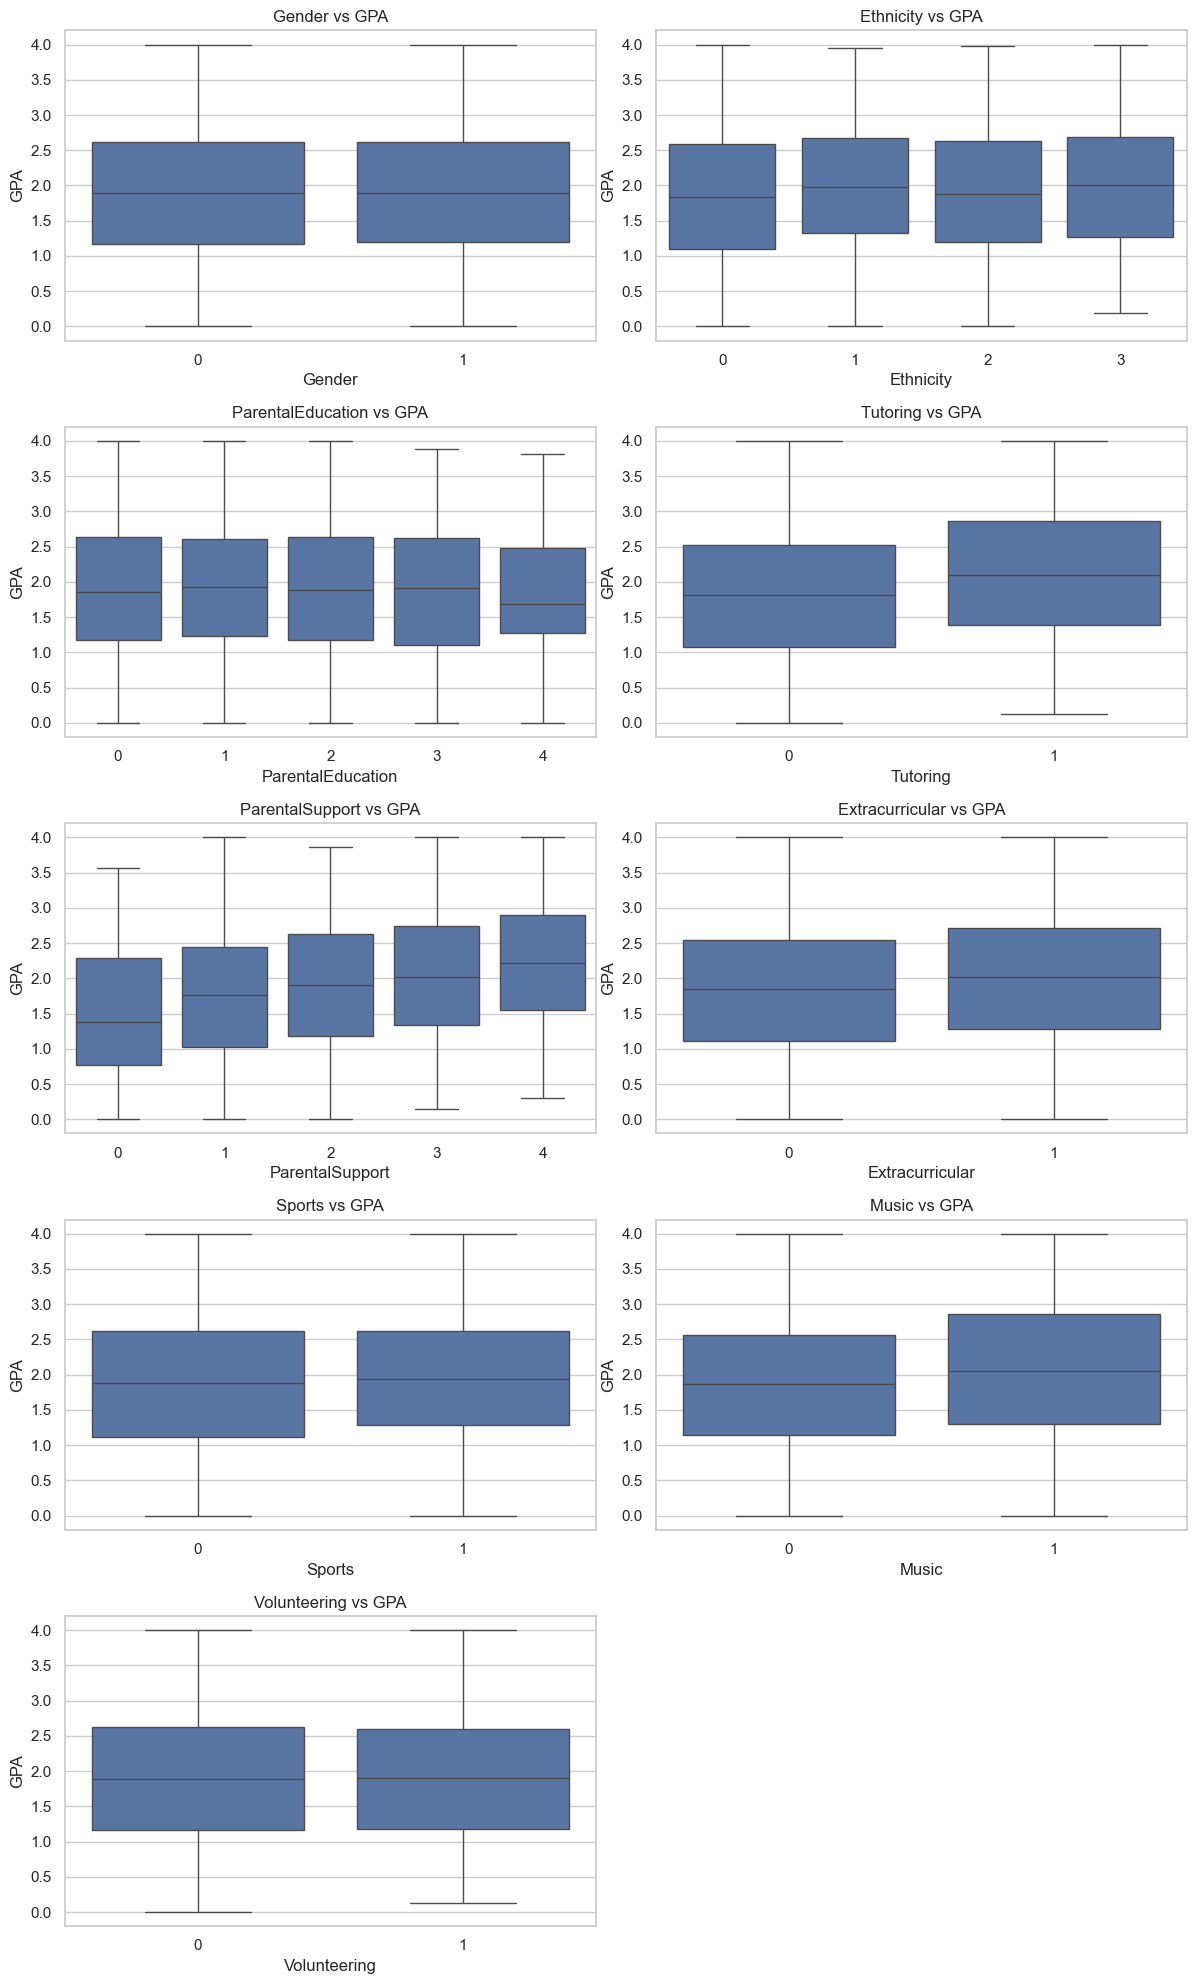

In [11]:
def plot_categorical_vs_gpa_subplots(df, target="GPA"):
    """
    Plot boxplots of GPA against all categorical features in subplots.
    
    Parameters
    ----------
    df : pd.DataFrame
        Dataset containing categorical features and the target.
    target : str, default="GPA"
        The numeric target column.
    """
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
    n = len(cat_cols)
    
    if n == 0:
        print("No categorical columns found.")
        return
    
    # Grid size (approx square)
    ncols = 2
    nrows = math.ceil(n / ncols)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows))
    axes = axes.flatten()
    
    for i, col in enumerate(cat_cols):
        sns.boxplot(x=df[col], y=df[target], ax=axes[i])
        axes[i].set_title(f"{col} vs {target}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target)
    
    # Remove empty subplots if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


plot_categorical_vs_gpa_subplots(eda_train, target="GPA")

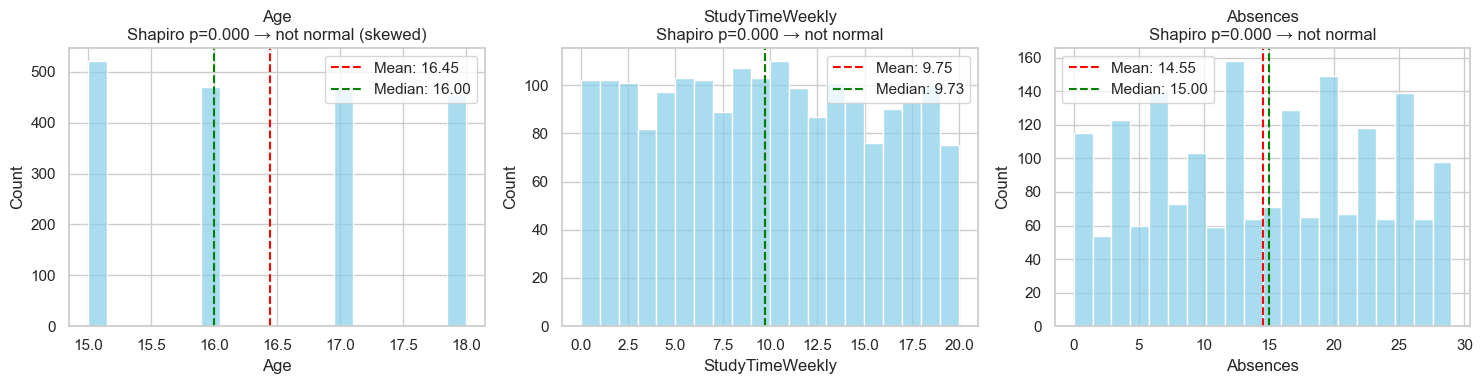

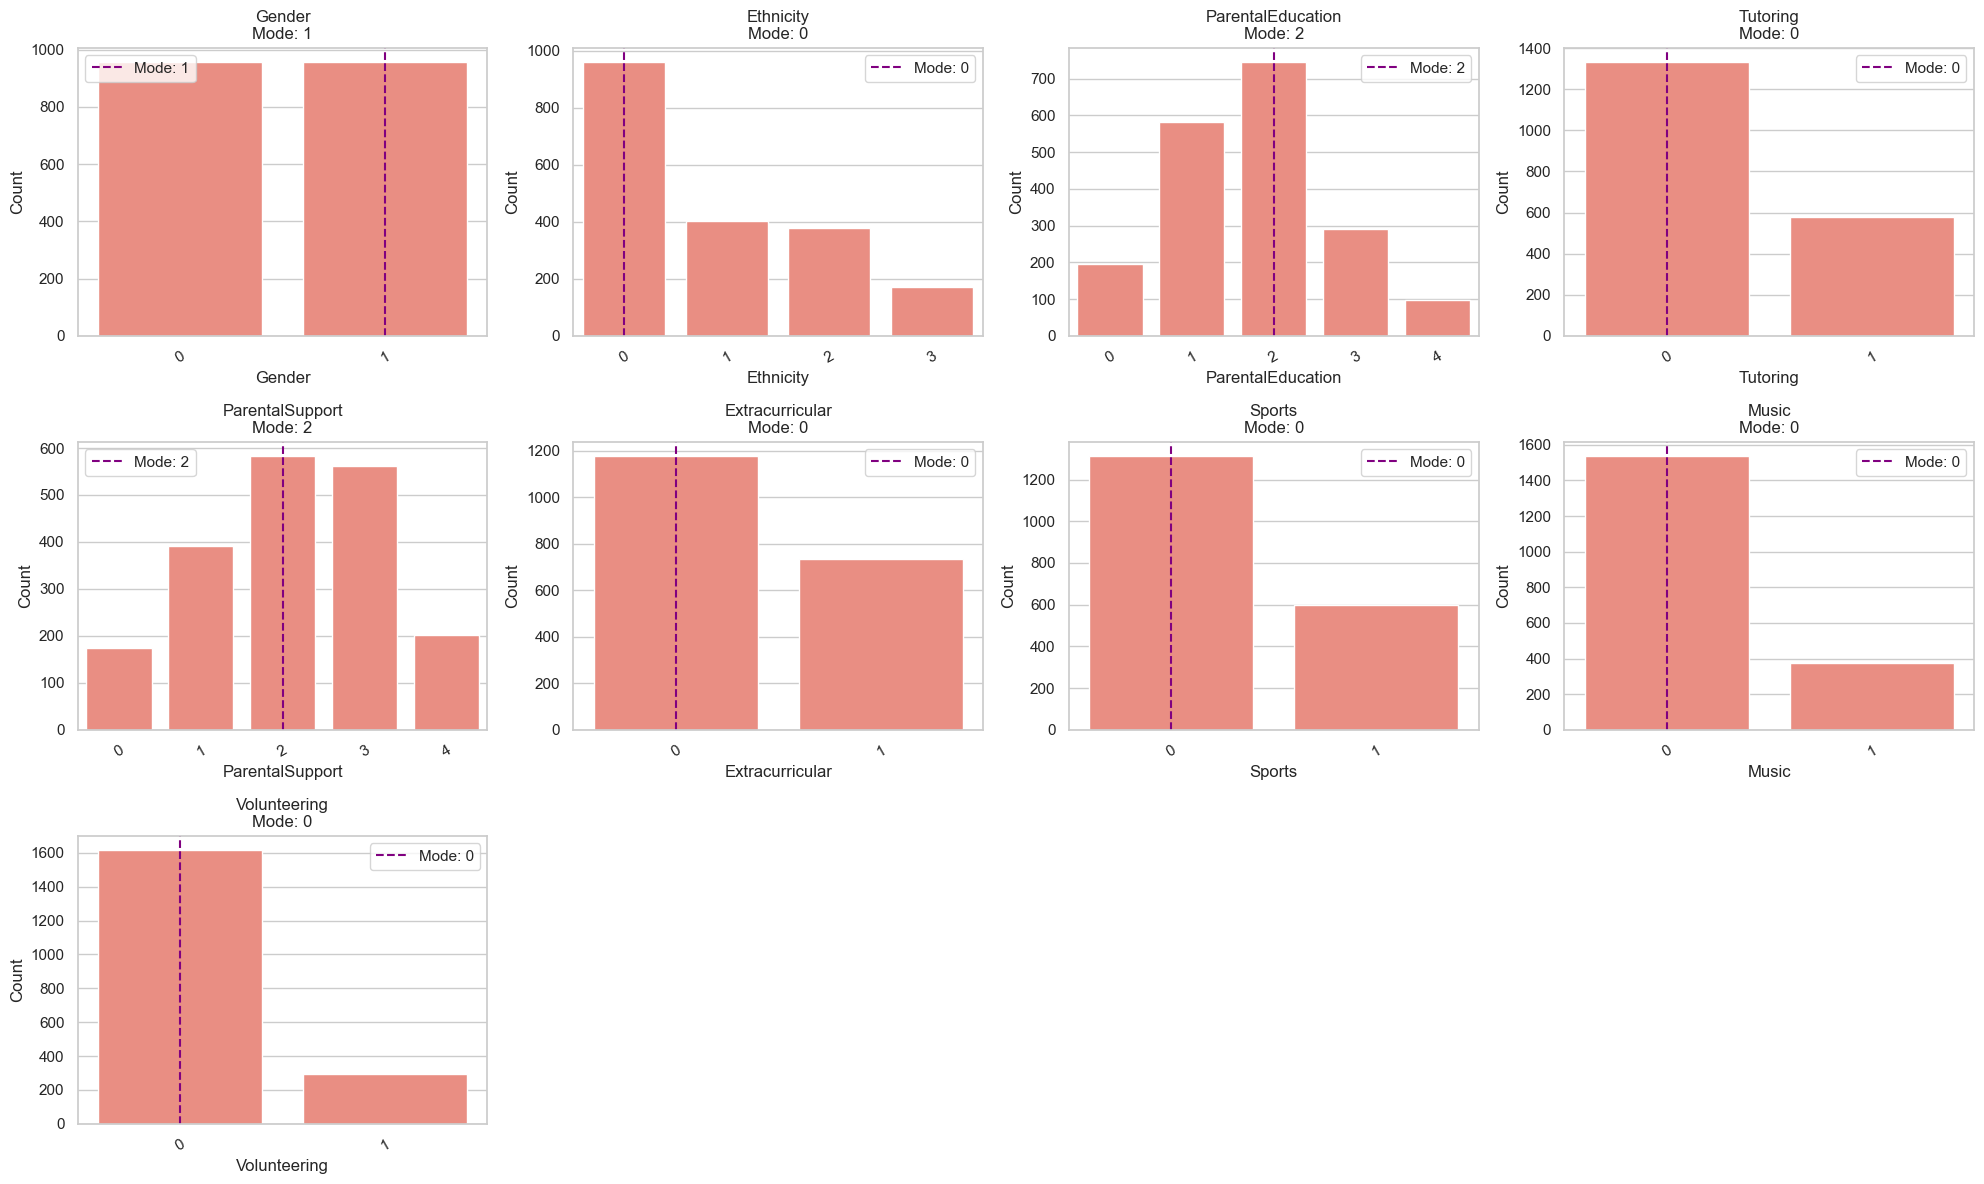

{'normality': {'Age': {'stat': 0.8531352823481223,
   'p': 5.967849208407726e-39,
   'normal_at_0.05': False},
  'StudyTimeWeekly': {'stat': 0.9581784642687354,
   'p': 5.00432721875086e-23,
   'normal_at_0.05': False},
  'Absences': {'stat': 0.9577104390009953,
   'p': 3.780177086816723e-23,
   'normal_at_0.05': False}}}

In [12]:
analysis.plot_distributions_by_type(eda_train, numeric_cols, categorical_cols)

None of the other numerical features seem to be normally distributed nor right/left skewed.

Top correlations:
 Absences          -0.917
StudyTimeWeekly    0.203
Age               -0.010
dtype: float64


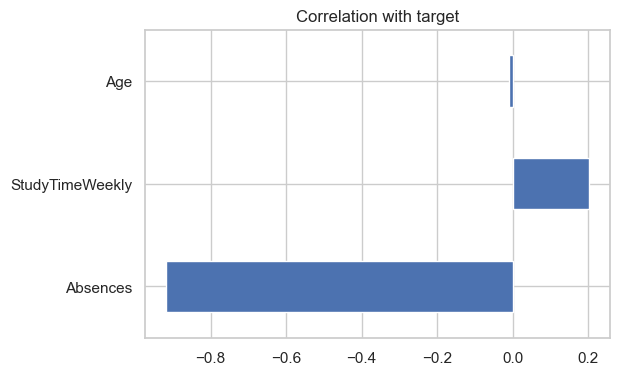

In [13]:
corrs = X_train[numeric_cols].corrwith(y_train).sort_values(key=abs, ascending=False)
print("Top correlations:\n", corrs.round(3))
corrs.plot.barh(figsize=(6,4)); plt.title("Correlation with target"); plt.show()

'Age' has basically no influence on target and therefore will be excluded from the modeling stage. On the other hand, absences seem to be highly (anti)correlating with the target, meaning more absences lead to a lower score. I don't think they will bring any leakage to the table. Finally, I can see there is small positive correlation between "StudyTimeWeekly" and the target, although I was expecting it to be more marked. 

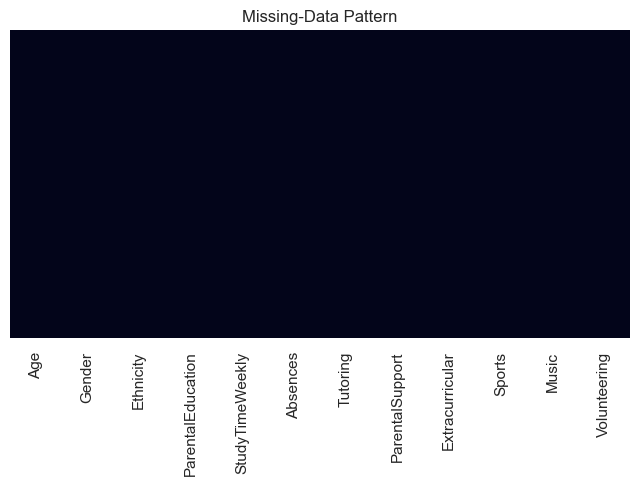

In [14]:
# MISSING DATA MAP

plt.figure(figsize=(8,4))
sns.heatmap(X_train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing-Data Pattern"); plt.show()

It was already pretty clear from the analysis so far that all numeric features do not include significant outliers, but to show this better:

In [15]:
# OUTLIERS
for col in numeric_cols:
    outs = analysis.iqr_outliers(X_train[col])
    print(f"{col}: {len(outs)} outliers ({len(outs)/len(X_train)*100:.1f}%)")

Age: 0 outliers (0.0%)
StudyTimeWeekly: 0 outliers (0.0%)
Absences: 0 outliers (0.0%)


No features are highly correlated to each other. 

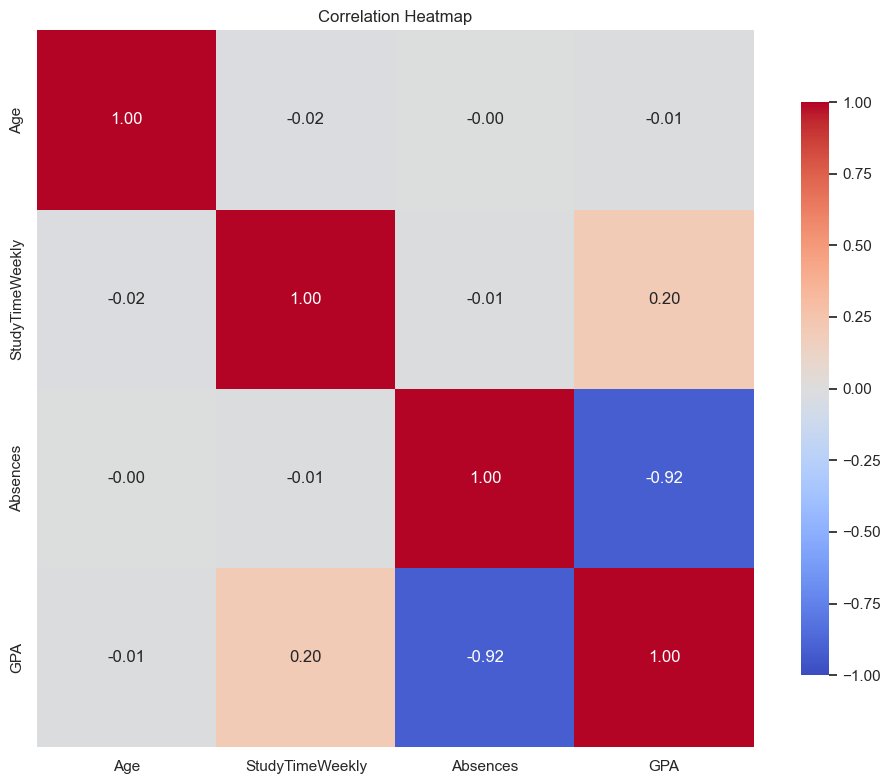

In [16]:
# FEATURE MULTICOLLINEARITY

# Add "GPA"
if "GPA" not in numeric_cols:
    numeric_cols.append("GPA")

# Compute correlation matrix
corr_mat = eda_train[numeric_cols].corr()

# Plot heatmap with annotations
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_mat, 
    annot=True,           # show numbers
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # color map
    vmin=-1, vmax=1,      # fixed scale for correlation
    square=True,          # keep it square-shaped
    cbar_kws={"shrink": .8}  # adjust colorbar size
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

As you can clearly see, `Adbsences` and `GPA` seem to be highly correlating (0.92). Although this value might suggest some sort of data leakage, I don't think it's the case as the features seem to be independent from each other and `GPA` has been established after `Absences`. There is also a slight positive correlation between `StudyTimeWeekly` and `GPA` (0.20).

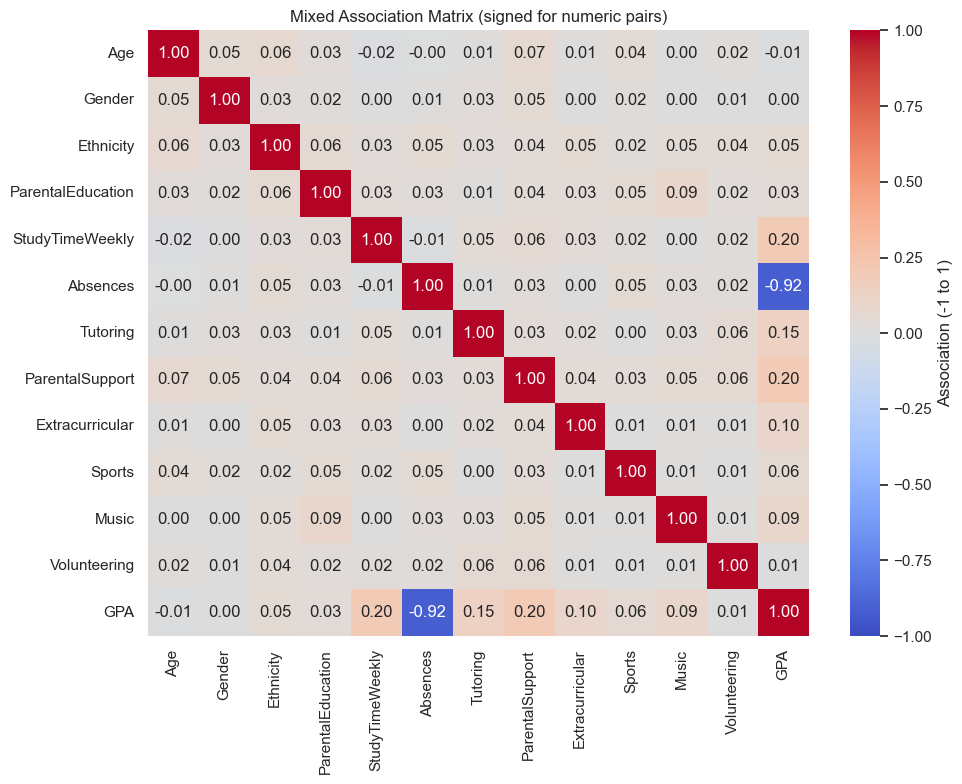

In [17]:
# Full heatmap (Mixed Correlation Matrix)
corr = analysis.mixed_corr(eda_train, numeric_corr="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, annot=True, fmt=".2f",
    cmap="coolwarm", vmin=-1, vmax=1, center=0,
    cbar_kws={"label": "Association (-1 to 1)"}
)
plt.title("Mixed Association Matrix (signed for numeric pairs)")
plt.tight_layout()
plt.show()


I have also decided to plot a full heatmap of associations between all features (numeric–numeric, categorical–categorical, and numeric–categorical).

That means I needed to compute a mixed correlation matrix:

>- **Numeric vs Numeric** → Pearson’s r
>- **Categorical vs Categorical** → Cramer’s V
>- **Categorical vs Numeric** → Correlation ratio (η)

Check the analysis.py for a better understanding of the functions I have used. What sticks out is that `Absences` is again the most (begatively) correlated to the target, followed by`StudyTimeWeekly`. Most features don't seem to have a linear correlation with the target. 

In [18]:
# EDA Summary Dashboard

# Abs value of most correlated feature with target
strongest_feature = corrs.abs().idxmax()
strongest_value = corrs[strongest_feature]

print("EDA SNAPSHOT")
print(f"- Target skew: {y_train.skew():.2f}")
print("- Strongest predictor:", strongest_feature, f"{strongest_value:.3f}")

# Calculate percentage of missing values per column
missing_percentages = (X_train.isnull().mean() * 100).sort_values(ascending=False)

# Filter only columns with missing values
missing_cols = missing_percentages[missing_percentages > 0]

# Conditional print
if not missing_cols.empty:
    print("- op columns with missing values (%):\n", missing_cols.head(3).round(1))
else:
    print("- No missing values detected in X_train.")

EDA SNAPSHOT
- Target skew: 0.02
- Strongest predictor: Absences -0.917
- No missing values detected in X_train.


### 3.2 - EDA INSIGHT SUMMARY

**Executive Summary**
- The dataset is **nearly modeling-ready**, with no missing values in the main numerical features and no significant outliers or multicollinearity.
- **Absences** appear to be the strongest predictor of GPA, with a strong negative correlation.
- The prediction task is **moderately difficult**, as only one feature shows strong correlation with the target.


**Technical Summary**

### Target Variable (GPA)
- **Mean:** 1.91 | **Median:** 1.90 | **Std:** 0.91 | **Range:** [0.00, 4.00]
- **Distribution:** Not formally normal (Shapiro-Wilk p ≈ 0), but **visually close to symmetric**.
- **No missing values or outliers** detected.

**Numeric Features**
| Feature           | Mean  | Median | Std  | Min  | Max  | Outliers |
|-------------------|-------|--------|------|------|------|----------|
| Age               | 16.45 | 16.00  | 1.13 | 15.0 | 18.0 | 0 (0.0%)  |
| StudyTimeWeekly   | 9.75  | 9.73   | 5.69 | 0.0  | 19.9 | 0 (0.0%)  |
| Absences          | 14.55 | 15.00  | 8.41 | 0.0  | 29.0 | 0 (0.0%)  |

**Correlation with target**:
- Absences: **−0.917**
- StudyTimeWeekly: **+0.203**
- Age: **−0.010** (excluded from modeling)

**Categorical Features (Mode Analysis)**
| Feature             | Most Frequent | Frequency |
|---------------------|----------------|-----------|
| Gender              | 1              | 958       |
| Ethnicity           | 0              | 962       |
| ParentalEducation   | 2              | 747       |
| Tutoring            | 0              | 1335      |
| ParentalSupport     | 2              | 584       |
| Extracurricular     | 0              | 1179      |
| Sports              | 0              | 1315      |
| Music               | 0              | 1540      |
| Volunteering        | 0              | 1619      |

> Features like **sports**, **music**, **volunteering**, **extracurriculars**, **tutoring**, and **parental support** all show a **positive relationship with GPA** when grouped.


**Risk Assessment**

- An **unexpected pattern** was found: students with `ParentalEducation = 0` had **higher GPA** than those with `ParentalEducation = 4`, which contradicted expectations.
- Further investigation revealed that in **Pakistani datasets**, education levels are often **inversely coded**:
    - `0` = **maximum education**
    - `4` = **no formal education**
- This inverted coding explained the anomaly and prevented a misinterpretation of the data.

- No feature leakage was detected.
- No multicollinearity issues identified.


**Decision Support**

**Feature Prioritization**
- **Include**: Absences (strongest), StudyTimeWeekly (moderate), categorical features (several show class-wise GPA variation)
- **Exclude**: Age (negligible correlation)

**Preprocessing Roadmap**
1. **Review categorical encodings** (especially `ParentalEducation`)
2. **Encode categorical variables** (ordinal and nominal)
3. **Standardize or scale** numeric features if required for the algorithm
4. **Split and cross-validate** for model evaluation

**Modeling Strategy**
- Start with a **regularized linear model** (e.g., Ridge or Lasso) to capture main relationships
- Consider **tree-based models** (e.g., Random Forest, XGBoost) to handle non-linear patterns in categorical features
- Track performance evolution and adjust for fairness if needed (e.g., by gender, socioeconomic proxy)

### 3.3 - HYPOTHESIS TESTING

In [19]:
results = {}

# H1: Correlation between Parental Education and GPA
if "ParentalEducation" in eda_train.columns:
    corr, pval = pearsonr(eda_train["ParentalEducation"], eda_train["GPA"])
    results["H1_parentEdu"] = {"corr": corr, "pval": pval}

# H2: Study time and absences vs GPA
if "StudyTimeWeekly" in eda_train.columns:
    corr, pval = pearsonr(eda_train["StudyTimeWeekly"], eda_train["GPA"])
    results["H2_studytime"] = {"corr": corr, "pval": pval}

if "Absences" in eda_train.columns:
    corr, pval = pearsonr(eda_train["Absences"], eda_train["GPA"])
    results["H2_absences"] = {"corr": corr, "pval": pval}

# H3: Gender differences in GPA
if "Gender" in eda_train.columns:
    male_gpa = eda_train.loc[eda_train["Gender"] == 0, "GPA"]
    female_gpa = eda_train.loc[eda_train["Gender"] == 1, "GPA"]

    # Normality check (Shapiro-Wilk)
    p_male = shapiro(male_gpa).pvalue
    p_female = shapiro(female_gpa).pvalue

    if p_male > 0.05 and p_female > 0.05:
        # Data looks normal → use paired t-test if paired, otherwise independent t-test
        tstat, pval = ttest_rel(male_gpa.sample(min(len(male_gpa), len(female_gpa)), random_state=42),
                                female_gpa.sample(min(len(male_gpa), len(female_gpa)), random_state=42))
        test_used = "Paired t-test"
    else:
        # Non-normal → use Wilcoxon
        paired_sample = pd.DataFrame({
            "male": male_gpa.sample(min(len(male_gpa), len(female_gpa)), random_state=42).values,
            "female": female_gpa.sample(min(len(male_gpa), len(female_gpa)), random_state=42).values
        })
        tstat, pval = wilcoxon(paired_sample["male"], paired_sample["female"])
        test_used = "Wilcoxon"

    results["H3_gender"] = {"test": test_used, "stat": tstat, "pval": pval}

# Display results in a table
pd.DataFrame(results).T

,corr,pval,test,stat
H1_parentEdu,-0.022463,0.326115,NaN,NaN
H2_studytime,0.202681,0.0,NaN,NaN
H2_absences,-0.916987,0.0,NaN,NaN
H3_gender,NaN,0.821103,Wilcoxon,226317.0


**Results**

| Hypothesis | Test | Result | Interpretation |
|------------|------|--------|----------------|
| **H1: Parental education → GPA** | Pearson correlation | r = -0.02, p = 0.33 | No significant relationship. Parental education level does not appear correlated with GPA in this sample. |
| **H2a: Study time → GPA** | Pearson correlation | r = 0.20, p < 0.001 | Significant positive correlation. Students who dedicate more hours to study each week tend to achieve higher GPA. |
| **H2b: Absences → GPA** | Pearson correlation | r = -0.92, p < 0.001 | Extremely strong negative correlation. Frequent absences strongly predict lower GPA. |
| **H3: Gender → GPA** | Wilcoxon rank-sum | stat = 226317, p = 0.82 | No significant difference in GPA between genders. Once other factors are considered, gender has negligible predictive power. |

**Summary:**  
- Hypothesis **H1** is not supported.  
- Hypothesis **H2** is strongly supported: study habits and attendance are powerful predictors.  
- Hypothesis **H3** is supported: gender differences are statistically insignificant.  

---
# 4 - FEATURE ENGENEERING

**Motivation and Rationale**

After having explored the training set and identified potential patterns and the features with the most predictive power and the one that seem to be slightly correlating with the target, it is important to reflect on **ways to enhance model performance later**. This could be for instance achieved through **feature engeneering**. Although I think I would not need much more to come up with a good performative model, I have decided to engeneering two new feature to see if that can help increase the predictive power ot the model. In addition to the original features, I explored engineered variables aimed at capturing **family resources** and **student engagement** in a more integrated way:

- **Family Capital Score (FCS)**  
  Combines *Parental Education (PE)* and *Parental Support (PS)* into a single index.  
  The idea is that structural capital (education level) and emotional capital (support) together shape a student’s learning environment.  
  By inverting the PE scale (`0 = max education → flipped so higher = better`), the score was defined as:  

  $$
  FCS = (4 - PE) \times PS
  $$

  The hypothesis: students with both supportive and well-educated parents should perform better than suggested by either variable alone.

**Engagement Index (EI)**  
  Combines extracurricular activities (*Extracurricular, Sports, Music, Volunteering*) relative to study effort (*StudyTimeWeekly*).  
  The idea is that being engaged in activities outside of class may enhance skills, motivation, or time management, especially when balanced with study time.  

  $$
  EI = \frac{\text{Extracurricular + Sports + Music + Volunteering}}{\text{StudyTimeWeekly} + 1}
  $$

  The hypothesis: higher engagement, when coupled with adequate study, could correlate with stronger performance.

**Evaluation Strategy**

To evaluate the impact of these engineered features, I systematically compared three setups:

1. **Original features only** (baseline).  
2. **Engineered features only** (FCS and EI, with original components removed).  
3. **Original + engineered features** (keeping both sets together).  

For each setup, I trained multiple regression models (e.g., Ridge Regression, Random Forest) and assessed performance through cross-validation (R² and MAE).

**Anticipated findings**

- The engineered features **did not significantly improve predictive performance** compared to the baseline with only original features.  
- In fact, models using **only the engineered features** performed worse than those using the raw inputs.  
- When combining **original + engineered features**, performance was almost identical to using only the originals.  
- This suggests that the models are already able to learn the same relationships directly from the raw inputs.  
- Feature importance analysis confirmed this: **FCS** and **EI** consistently ranked at the bottom, overshadowed by their base variables (e.g., parental support, study time).

**Final Decision**

Although conceptually meaningful, these engineered features **did not add predictive power**.  
For the **final model**, I decided to **exclude them** and retain the original features only.  

Nonetheless, documenting this exploration is valuable, as it shows that alternative representations of domain knowledge were tested and critically evaluated before selecting the most effective feature set.


After having explored the training set and identified potential patterns and the features with the most predictive power and the one that seem to be slightly correlating with the target, it is important to reflect on **ways to enhance model performance later**. This could be for instance achieved through **feature engeneering**. Although I think I would not need much more to come up with a good performative model, I have decided to engeneering two new feature to see if that can help increase the predictive power ot the model. 

The two engeneered features are:

- **Family Capital Score (FCS)** is a domain-driven feature created *before the train/test split*, since it does not rely on dataset statistics.  
It combines **Parental Education (PE)** and **Parental Support (PS)** into a single index of family capital.  
The original education scale was inverted (`0 = max education`), so the scale is flipped to ensure that **higher values indicate higher education**.  
- The resulting score captures both **structural resources** (education) and **emotional support** (parental support).  
$$
FCS = (4 - PE) \times PS
$$

- **Engagement Index (EI)**: it is a domain-informed feature that helps quantify balance between studying and extracurriculars. It must be applied carefully (train-defined, fairness checked), but it has potential to both improve predictions and give meaningful insights to educators and policymakers. It represents the sum of all extracurriculars (Sports (S), Music (M), Volunteering (V)) normalized by study time (ST) + 1 (to avoid dividing by numbers close to 0). Notes: it captures breadth of engagement vs focus on studying. If a student has many activities but very little study time, EI is high (risk of distraction). If they have balanced activities with study time, EI is moderate (healthy balance). 
$$
EI \;=\; \frac{S + M + V}{ST + 1}
$$

>Data Leakage Note: this step of engeneering new features has been performed at this point for continuity as it is a consequence of the EDA findings (correlation between features and target, multicollinearity etc...). However, as it does not involve any statistical operations on the dataset and it does not use the target variable (GPA), it could have been performed before the split without any risk of data leakage.

### 4.1 - ADDING FEATURES

Below you can find all the steps I followed to create the new features. 

**Feature Engineering and Export of Three Dataset Variants**

In this step, we create two engineered features and prepare three dataset variants for later comparison.  
The process is **leakage-safe**, meaning all normalization parameters are computed only from the training set and then applied to the test set.  

**Steps performed:**  
1. **Normalization of parental variables**  
   - `ParentalEducation` is inverted (so higher = more capital).  
   - `ParentalSupport` is normalized.  
   - Normalization uses min–max values from the training set only.  

2. **Engineered features**  
   - **Family Capital Score (FCS_nl):** interaction between inverted parental education and parental support, with a logarithmic transformation to capture diminishing returns.  
   - **Engagement Index (EngIndex_nl):** combines extracurricular activity participation with study time, using `log` and `sqrt` to reduce outlier influence.  

3. **Three dataset variants for comparison**  
   - **All + both features:** original variables plus both engineered features.  
   - **All + FCS only:** original variables plus `FCS_nl`.  
   - **All + Engagement only:** original variables plus `EngIndex_nl`.  

4. **Export**  
   - Each variant (train and test) is saved as a `.pkl` file in the `../data/interim/` folder.  
   - Optional CSV export is included but commented out.  

This setup allows us to test whether both engineered features are useful together, or if a single feature is sufficient.


In [20]:
X_train

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,17,1,2,2,19.856080,23,1,1,1,0,0,0
1,18,0,3,1,6.185362,12,0,0,0,0,0,0
2,17,1,2,1,10.027020,7,0,3,0,0,1,0
3,16,1,1,3,1.511090,3,0,3,0,0,0,0
4,17,1,2,1,12.233114,21,1,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1908,16,1,1,2,13.434897,4,0,3,0,0,1,0
1909,18,0,2,2,8.780585,17,0,4,1,0,0,0
1910,16,0,1,1,15.167695,27,0,3,1,1,0,0
1911,17,1,0,1,8.830946,10,1,1,0,1,1,0


In [21]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

def cols_present(df, cols):
    return [c for c in cols if c in df.columns]

# Normalizations calculated only on the training set
pe_max = 4  # adjust to your ParentalEducation coding scale

base_needed = ["ParentalEducation", "ParentalSupport", "StudyTimeWeekly"]
activity_cols = ["Extracurricular", "Sports", "Music", "Volunteering"]

missing_train = [c for c in base_needed if c not in X_train_new.columns]
if missing_train:
    raise KeyError(f"Missing in TRAIN: {missing_train}")

inv_pe_tr = pe_max - X_train_new["ParentalEducation"]
ps_tr     = X_train_new["ParentalSupport"]

inv_pe_min, inv_pe_max = float(inv_pe_tr.min()), float(inv_pe_tr.max())
ps_min, ps_max         = float(ps_tr.min()),     float(ps_tr.max())

inv_pe_tr_n = utils.minmax(inv_pe_tr, inv_pe_min, inv_pe_max)
ps_tr_n     = utils.minmax(ps_tr,     ps_min,     ps_max)

inv_pe_te_n = utils.minmax(pe_max - X_test["ParentalEducation"], inv_pe_min, inv_pe_max)
ps_te_n     = utils.minmax(X_test["ParentalSupport"],             ps_min,     ps_max)

# Engineered non-linear features
X_train_new["FCS_nl"] = inv_pe_tr_n * np.log1p(ps_tr_n)
X_test_new["FCS_nl"]  = inv_pe_te_n * np.log1p(ps_te_n)

act_cols_tr = cols_present(X_train_new, activity_cols)
act_cols_te = cols_present(X_test_new,  activity_cols)

act_sum_tr = X_train_new[act_cols_tr].sum(axis=1) if act_cols_tr else 0
act_sum_te = X_test_new[act_cols_te].sum(axis=1)  if act_cols_te else 0

X_train_new["EngIndex_nl"] = np.log1p(act_sum_tr) / np.sqrt(X_train_new["StudyTimeWeekly"] + 1)
X_test_new["EngIndex_nl"]  = np.log1p(act_sum_te) / np.sqrt(X_test_new["StudyTimeWeekly"] + 1)

# Build three comparison setups
engineered_names = {"FamilyCapitalScore", "EngagementIndex", "FCS_nl", "EngIndex_nl"}
original_cols = [c for c in X_train_new.columns if c not in engineered_names]

Xtr_all_both = X_train_new[original_cols + ["FCS_nl","EngIndex_nl"]].copy()
Xte_all_both = X_test_new[original_cols + ["FCS_nl","EngIndex_nl"]].copy()

Xtr_all_fcs  = X_train_new[original_cols + ["FCS_nl"]].copy()
Xte_all_fcs  = X_test_new[original_cols + ["FCS_nl"]].copy()

Xtr_all_eng  = X_train_new[original_cols + ["EngIndex_nl"]].copy()
Xte_all_eng  = X_test_new[original_cols + ["EngIndex_nl"]].copy()

# 4) Save to processed folder (uses your utils.save_dataset)
utils.save_dataset(Xtr_all_both, "processed/01_X_train_ALL_plus_both.xlsx")
utils.save_dataset(Xte_all_both, "processed/01_X_test_ALL_plus_both.xlsx")

utils.save_dataset(Xtr_all_fcs, "processed/01_X_train_ALL_plus_FCS.xlsx")
utils.save_dataset(Xte_all_fcs, "processed/01_X_test_ALL_plus_FCS.xlsx")

utils.save_dataset(Xtr_all_eng, "processed/01_X_train_ALL_plus_ENG.xlsx")
utils.save_dataset(Xte_all_eng, "processed/01_X_test_ALL_plus_ENG.xlsx")

utils.save_dataset(X_train, "processed/01_X_train_original.xlsx")
utils.save_dataset(X_test, "processed/01_X_test_original.xlsx")

print("✅ X_train and X_test sets saved with new features saved.")

File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\processed\01_X_train_ALL_plus_both.xlsx
File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\processed\01_X_test_ALL_plus_both.xlsx
File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\processed\01_X_train_ALL_plus_FCS.xlsx
File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\processed\01_X_test_ALL_plus_FCS.xlsx
File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\To

<div class="alert alert-block alert-info">
<b>Next Notebook - Preprocessing
</div>